# Logistic Regression

* Nos ayuda a clasificar nuestros registros en dos o mas categorias. 

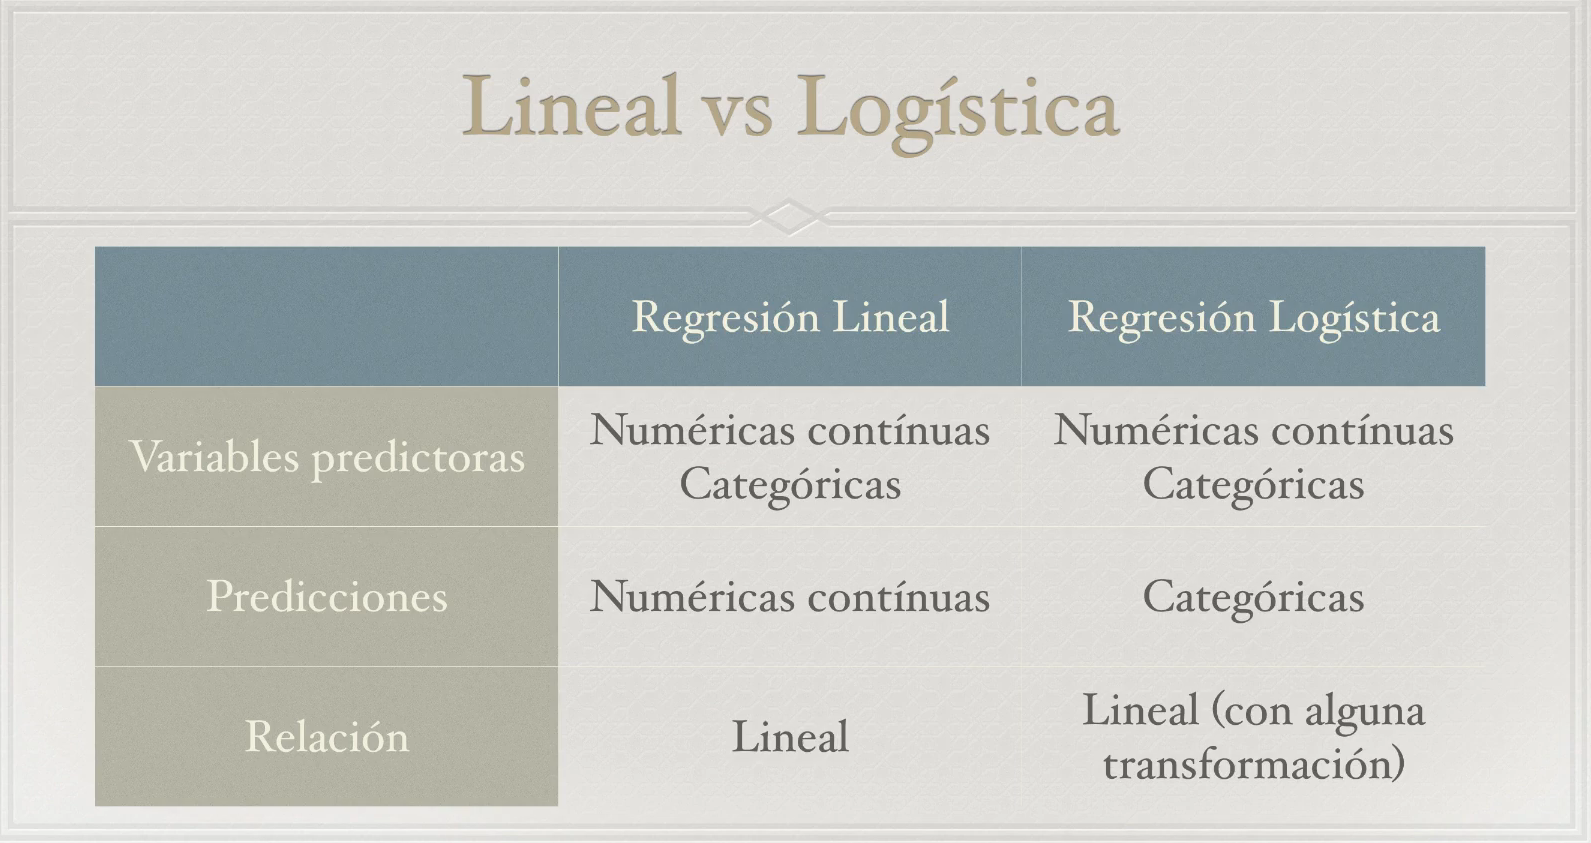

## Tablas de contingencia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from IPython .core. interactiveshell import InteractiveShell  # todas las salidas
InteractiveShell . ast_node_interactivity = "all"

In [3]:
mainpath = "C://Users/lgces/Documents/GitHub/python-ml-course/datasets/"
df = pd.read_csv(mainpath+'gender-purchase/Gender Purchase.csv')
df.head()
df.shape

Gender Purchase
0  Female      Yes
1  Female      Yes
2  Female       No
3    Male       No
4    Male      Yes

(511, 2)

In [4]:
contingency_table = pd.crosstab(df['Gender'], df['Purchase'])
contingency_table

Purchase   No  Yes
Gender            
Female    106  159
Male      125  121

In [5]:
contingency_table.sum(axis=1)
contingency_table.sum(axis=0)

#Probabilidades en una tabla de contingencia
contingency_table.astype('float').div(contingency_table.sum(axis=1), axis=0)

Gender
Female    265
Male      246
dtype: int64

Purchase
No     231
Yes    280
dtype: int64

Purchase       No      Yes
Gender                    
Female    0.40000  0.60000
Male      0.50813  0.49187

## Probabilidad condicional 

In [6]:
from IPython.display import display, Math, Latex

* La probabilidad de que un cliente compre un producto sabiendo que es hombre

In [7]:
display(Math(r'P(Purchase|Male) = \frac{Numero\ total\ de\ compras\ hechas\ por\ hombres\ }{Numero\ total\ de\ hombres} = \frac{Purchase \cap Male}{Male}'))

<IPython.core.display.Math object>

In [8]:
121/246

0.491869918699187

* La probabilidad de que sabiendo que un cliente compra un producto sea mujer


In [9]:
display(Math(r'P(Mujer|Purcharse) = \frac{Numero\ total\ de\ compras\ hechas\ por\ mujeres\ }{Numero\ total\ de\ compras} = \frac{Female \cap Purchase}{Purchase}'))

<IPython.core.display.Math object>

In [10]:
159/280

0.5678571428571428

### Ratio de probabilidades

Es el conjunto, cociente de valores de probabilidades de exito/probabilidades de fracaso. 

El cociente de probabilidades estara entre 0 y mas infinito. 
* Si es mayor a 1, es mas probable el exito
* Si es menor a 1, es mas probalbe el fracaso
* Si es igual a 1, son equiprobables, p=0.5.

In [11]:
display(Math(r'P_{m} = Probabilidad\ de\ hacer\ compra\ sabiendo\ que\ es\ hombre'))
             
display(Math(r'odds_{Purchase, Male} = \frac{P_{M}}{1- P_{M}} = \frac{N_{P,M}}{N_{\bar P,M}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
pm = 121/246
pf = 159/265
odds_m = pm/(1-pm)#121/125
odds_f = pf/(1-pf)#159/106
odds_m
odds_f

#Ratio global
odds_g = odds_m/odds_f
odds_g

0.9680000000000002

1.4999999999999998

0.6453333333333335

## La regresion logistica desde la regresion lineal

* Lineal:

$ y = \alpha + \beta \cdot x$

$ (x,y) \in [-\infty, + \infty]^{2}$

* Logistica: 
y ahora es una variable discreta, o es 1 o 0. 

$ y \in [0,1]$

$ p \in [0,1]$

p es la probabilidad condicionada de exito o de fracaso condicionada a la presencia de la variable x

$p = \alpha + \beta \cdot x$

Ahora si se hace lo siguiente: 

$ln(\frac{P}{1- P} )= \alpha + \beta \cdot x$

Despejando P:

$ P = \frac{1}{1+e^{-(\alpha + \beta \cdot x)}} $

## Implementacion del metodo del estimador de maxima verosimilitud para la regresion logistica

### Definir la funcion de entorno L(b)

$L(\beta) = \sum_{i=0}^n P_i^{y_i} (1-P_i)^{1-y_i}$

In [13]:
def likelihood(y, pi):
    total_sum = 1
    sum_in = range(1,len(y)+1)
    for i in range(len(y)):
        sum_in[i]=np.where(y[i]==1, pi[i], 1-pi[i])
        total_sum = total_sum*sum_in[i]
    return total_sum

### Calcular las probabilidades de cada observacion

$ P_{i} = P(xi) = \frac{1}{1+e^{-\beta \cdot x_{i}}}$

In [14]:
def logitprobs (X, beta):
    n_rows = np.shape(X)[0]
    n_cols = np.shape(X)[1]
    pi = list(range(1,n_rows+1))
    expon = list(range(1,n_rows+1))
    
    for i in range(n_rows):
        expon[i] = 0
        for j in range(n_cols):
            ex = X[i][j] * beta[i]
            expon[i]=ex + expon[i]
        with np.errstate(divide = 'ignore', invalid = 'ignore'):
            pi[i]=1/(1+np.exp(-expon[i]))
    return pi
        
        

### Calcular la matriz diagonal W

In [15]:
def findW(pi):
    n = len(pi)
    W = np.zeros(n*n).reshape(n,n)
    for i in range(1,n):
        print(i)
        W[i,i] = pi[i]*(1-pi[i])
        W[i,i].astype(float)
    return W

### Obtener la solucion de la funcion logistica
#### Metodo de Newton-Rapshon

In [16]:
def logistics(X, Y, limit):
    from numpy import linalg 
    n_row = np.shape(X)[0]
    bias = np.ones(n_row).reshape(n_row,1)
    X_new = np.append(X, bias, axis =1)
    n_col = np.shape(X)[1]
    beta = np.zeros(n_col).reshape(n_col,1)
    root_dif = np.array(range(1,n_col+1)).reshape(n_col,1)
    iter_i = 10000
    while(iter_i>limit):
        print(str(iter_i) + ','+ str(limit))
        pi = logitprobs(X_new, beta)
        print(pi)
        W = findW(pi)
        print(W)
        
        num = np.tranpose(np.matrix(X_new))*np.matrix(Y - np.tranpose(pi)).transpose()
        
        den = np.matrix(np.transpose(X_new))*np.matrix(W)*np.matrix(X_new)
        
        root_dif = np.array(linalg.inv(den)*num)
        
        beta = beta+root_dif
        print(beta)
        iter_i = np.sum(root_dif*root_dif)
        print(iter_i)
        ll = likelihood(Y, pi)
    return beta

In [17]:
X = np.array(range(10)).reshape(10,1)
X

Y = np.array([0,0,0,0,1,0,1,1,0,1])
Y
bias = np.ones(10).reshape(10,1)
bias
X_new = np.append(X, bias, axis=1)
X_new
type(X_new[0][1])

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.],
       [8., 1.],
       [9., 1.]])

numpy.float64

In [18]:
#a = logistics(X, Y, 0.00001)

### Utilizando statsmodel 

In [19]:
import statsmodels.api as sm

In [20]:
logit_model = sm.Logit(Y,X_new).fit()

Optimization terminated successfully.
         Current function value: 0.490137
         Iterations 6


In [21]:
print(logit_model.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.272   
Dependent Variable: y                AIC:              13.8027 
Date:               2022-02-02 15:41 BIC:              14.4079 
No. Observations:   10               Log-Likelihood:   -4.9014 
Df Model:           1                LL-Null:          -6.7301 
Df Residuals:       8                LLR p-value:      0.055817
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
x1        0.5279     0.3377    1.5630   0.1180   -0.1340   1.1898
const    -2.9883     1.9290   -1.5491   0.1213   -6.7691   0.7925



## Regresion logistica para predicciones bancarias

In [22]:
mainpath = "C://Users/lgces/Documents/GitHub/python-ml-course/datasets/"
df = pd.read_csv(mainpath+'bank/bank.csv', sep = ';')
df.head(1)
df.shape
df.columns.values

age          job  marital education default housing loan   contact month  \
0   30  blue-collar  married  basic.9y      no     yes   no  cellular   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         fri  ...         2    999         0  nonexistent         -1.8   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          92.893          -46.2      1.313       5099.1  no  

[1 rows x 21 columns]

(4119, 21)

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [23]:
df['y'] = (df['y']=='yes').astype(int)
#df.tail()
#df.head(10)
df['education'].unique() 
#Se extraen clases unicas de education 

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

* Renombrando las categorias en la columna Education

In [24]:
df['education'] = np.where(df['education']=='basic.9y', 'Basic', df['education'])
df['education'] = np.where(df['education']=='basic.6y', 'Basic', df['education'])
df['education'] = np.where(df['education']=='basic.4y', 'Basic', df['education'])
df['education'] = np.where(df['education']=='high.school', 'High School', df['education'])
df['education'] = np.where(df['education']=='university.degree', 'University Degree', df['education'])
df['education'] = np.where(df['education']=='professional.course', 'Professional Course', df['education'])
df['education'] = np.where(df['education']=='illiterate', 'Illiterate', df['education'])
df['education'] = np.where(df['education']=='unknown', 'Unknown', df['education'])
#df.rename(columns={'default': 'Default'}, inplace=True)

In [25]:
df['education'].unique() 

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [26]:
df['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [27]:
#df.groupby('education').mean()

Text(0.5, 1.0, 'Frecuencia de compra en funcion del nivel de educacion')

Text(0.5, 0, 'Nivel de educacion')

Text(0, 0.5, 'Frecuencias de compra del producto')

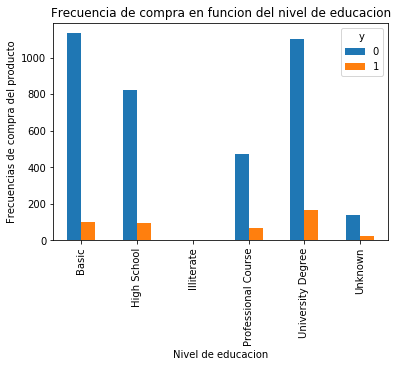

In [28]:
pd.crosstab(df.education, df.y).plot(kind='bar')
plt.title('Frecuencia de compra en funcion del nivel de educacion')
plt.xlabel('Nivel de educacion')
plt.ylabel('Frecuencias de compra del producto')

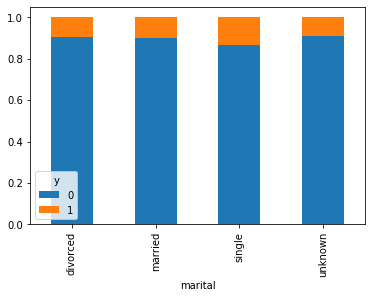

In [29]:
table = pd.crosstab(df.marital, df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked =True)


### Seleccion de variables del dataset para el modelo logistico

In [30]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [31]:
categories = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome' ]

for category in categories:
    cat_dummies = pd.get_dummies(df[category], prefix=category)
    df_new = df.join(cat_dummies)
    df = df_new

df_vars = df.columns.values.tolist()
df_vars



['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_Unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 '

In [32]:
to_keep = [v for v in df_vars if v not in categories]
#to_keep = [v for v in df_vars if v not in ['default']]
to_keep

['age',
 'default',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_Unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutco

In [33]:
bank_df = df[to_keep]
bank_df.columns.values

array(['age', 'default', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu'

In [34]:
bank_df_vars = bank_df.columns.values.tolist()
bank_df_vars
y = ['y','default']
Y = ['y']
X = [v for v in bank_df_vars if v not in y ]
X



['age',
 'default',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_Unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutco

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_Unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'pou

### Seleccion de rasgos para el modelo

In [35]:
n=12
from sklearn import datasets
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()  

In [37]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_df[X], bank_df[Y].values.ravel())

print(rfe.support_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[False False False False  True False False False  True False False False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
 False False False False False False False  True False  True]


In [38]:
print(rfe.ranking_)

[40 39 18 45  1 17 26 22  1 35  2  8  5 38  7  1  6 24 42  1  1 41 15 28
 27 47 31 12 46 19 30  4  9 14 43 13 20 32 11  3 37 21  1  1  1  1  1 23
 33 44 34 25 29 36 10  1 16  1]


In [39]:
depur = list(zip(rfe.support_, X))
#depur 
depur_vars =[]
for i in depur:
    #print(i[1])
    for j in i:
        #print(j, '\n')
        if j ==True:
            #print(-)
            depur_vars.append(i[1])
            #print(j)
    
depur_vars

['previous',
 'euribor3m',
 'job_retired',
 'job_technician',
 'job_unemployed',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'poutcome_failure',
 'poutcome_success']

### Implementacion del modelo con statsmodel.api

In [40]:
import statsmodels.api as sm

In [41]:
logit_model = sm.Logit(bank_df[Y],bank_df[depur_vars]).fit()

Optimization terminated successfully.
         Current function value: 0.279578
         Iterations 7


In [42]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.191      
Dependent Variable: y                AIC:              2327.1654  
Date:               2022-02-02 15:41 BIC:              2403.0458  
No. Observations:   4119             Log-Likelihood:   -1151.6    
Df Model:           11               LL-Null:          -1422.9    
Df Residuals:       4107             LLR p-value:      2.5015e-109
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
previous           0.3539   0.1411   2.5077 0.0122  0.0773  0.6306
euribor3m         -0.6362   0.0270 -23.5419 0.0000 -0.6892 -0.5832
job_retired        0.0918   0.2209   0.4155 0.6777 -0.3411  0.5247
job_technician     0.0772   0.1468   0.5259 0.5990 -0.2105  0.3650
job_unemployed     0.1661   0.3028   0.5485 0.5833 -0.4274  0.7596
month_dec          0.6517   0.4663   1.3976 0.1622 -0.2622  1.5655
month_jul          0.3280   0.1837   1.7856 0.0742 -0.0320  0.6880
month_jun          0.3245   0.1689   1.9219 0.0546 -0.0064  0.6555
month_mar          1.0185   0.3157   3.2262 0.0013  0.3997  1.6372
month_may         -1.0666   0.1261  -8.4575 0.0000 -1.3138 -0.8195
poutcome_failure  -1.0788   0.2460  -4.3863 0.0000 -1.5609 -0.5968
poutcome_success   0.7482   0.2892   2.5870 0.0097  0.1813  1.3150
==================================================================

"""

* Statsmodel.api se utiliza para afinar y explorar el modelo y
* scikit learn se utiliza para crear el modelo final listo para produccion

* Consideraciones:
    * Entre mas pequeno sea el p-value mucho mayor es la significacion de la variable para el modelo (Estadistico de Wall). 

### Implementacion del modelo utilizando scikit-learn

In [43]:
from sklearn import linear_model

In [44]:
logit_model2 = linear_model.LogisticRegression().fit(bank_df[depur_vars], bank_df[Y].values.ravel())
logit_model2.score(bank_df[depur_vars], bank_df[Y])

0.9024034959941734

In [45]:
pd.DataFrame(list(zip(bank_df[depur_vars].columns, np.transpose(logit_model2.coef_))))

0                      1
0           previous   [0.3942297631698254]
1          euribor3m  [-0.5064212818861377]
2        job_retired    [0.345658692598274]
3     job_technician   [0.2160123062792191]
4     job_unemployed   [0.3075208668336417]
5          month_dec   [0.8099570561009025]
6          month_jul   [0.3687452140270656]
7          month_jun  [0.48876069129828753]
8          month_mar   [1.2109383273510745]
9          month_may  [-0.7468273518380114]
10  poutcome_failure  [-0.7684991948295378]
11  poutcome_success    [1.051760920039584]

* Consideraciones:
    * Los coeficinetes deben de leerse como el ln del cociente entre los valores P sobre 1 - P\
    $ ln(\frac{P}{1-P})$

### Validacion del modelo logistico


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(bank_df[depur_vars], bank_df[Y], test_size = 0.3, random_state = 0)

In [49]:
lr2 = linear_model.LogisticRegression().fit(X_train, Y_train.values.ravel())

#### Fijando el umbral de aceptacion o rechazo
$\varepsilon \in (0,1),  Y_{p} = \begin{cases} 0 & si\ p\leq \varepsilon\\ 1 & si\ p >\varepsilon \end{cases}$


In [50]:
#Fijando el umbral de comprar o no comprar
probs = lr2.predict_proba(X_test)
probs

array([[0.93832066, 0.06167934],
       [0.88678687, 0.11321313],
       [0.92089551, 0.07910449],
       ...,
       [0.71652874, 0.28347126],
       [0.97662726, 0.02337274],
       [0.23205897, 0.76794103]])

In [51]:
prediction = lr2.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [52]:
prob = probs[:,1]

In [53]:
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0]>threshold,1,0)
prob_df.head(2)

0  prediction
0  0.061679           0
1  0.113213           1

In [54]:
pd.crosstab(prob_df.prediction, columns='count')

col_0       count
prediction       
0             888
1             348

In [55]:
from sklearn import metrics


In [56]:
metrics.accuracy_score(Y_test, prediction)

0.9045307443365695

### Cross validation

Consiste en repetir un experimento varias veces partiendo los datos tantas veces sea necesaria y calculando la media aritmetica de las medias de evaluacion sobre las distintas particiones realizadas.\
Se utiliza en entornos de clasificadores y prediccion.\
En general, se desea calcular la precision del modelo.\
Es utilizada para que los modelo no sufra de probelmas de overcity, que el conjunto de test entreguen un modelo con un coeficiente de correlacion bajo. 

Esta se divide en:

   * Validacion cruzada de K iteraciones:\
       $ E = \frac{1}{K} \sum^{K}_{i=1} E_{i}$
   
       * Casi siempre se utilizan 10 iteraciones en este tipo de validacion. 
       
   * Validacion cruzada aleatoria:\
       $ E = \frac{1}{K} \sum^{K}_{i=1} E_{i}$
   * Validacion cruzada dejando uno fuera:\
        $ E = \frac{1}{N} \sum^{N}_{i=1} E_{i}$
       * Posee un error aporte al modelo bastante bajo.\
       
Donde E es el error del tipo de validacion
   
   

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
scores = cross_val_score(linear_model.LogisticRegression(), bank_df[depur_vars], bank_df[Y].values.ravel(), scoring='accuracy', cv=10)

In [ ]:
scores
scores.mean()

### Matrices de Confucion

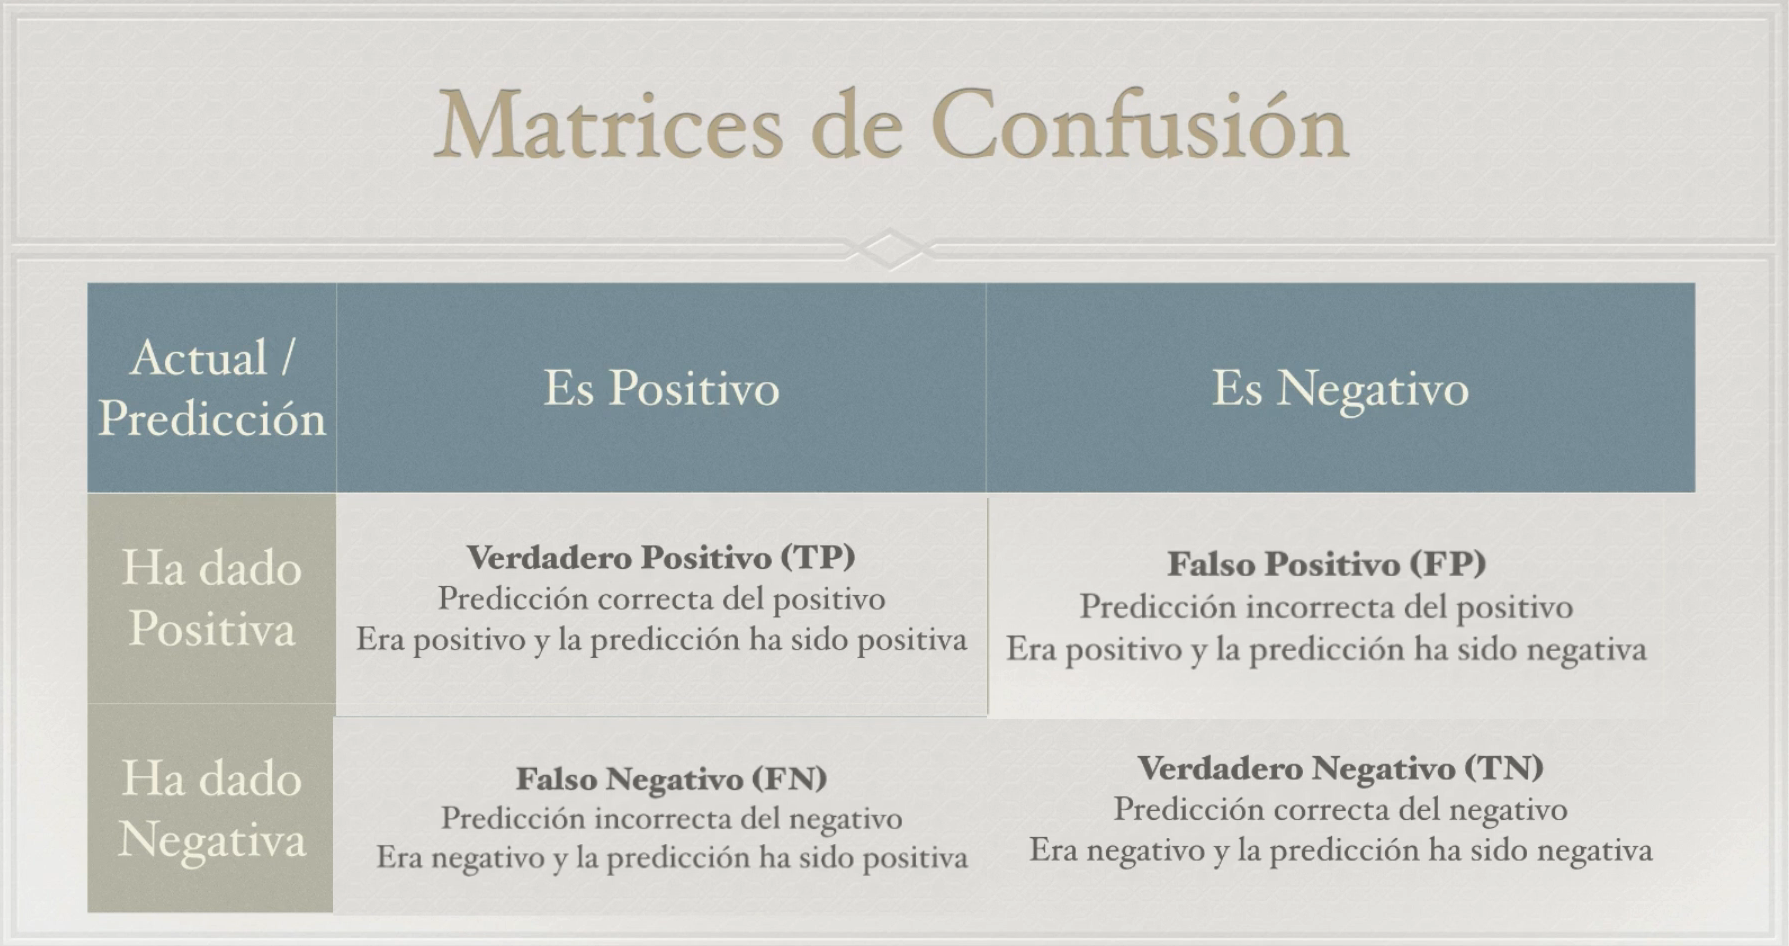

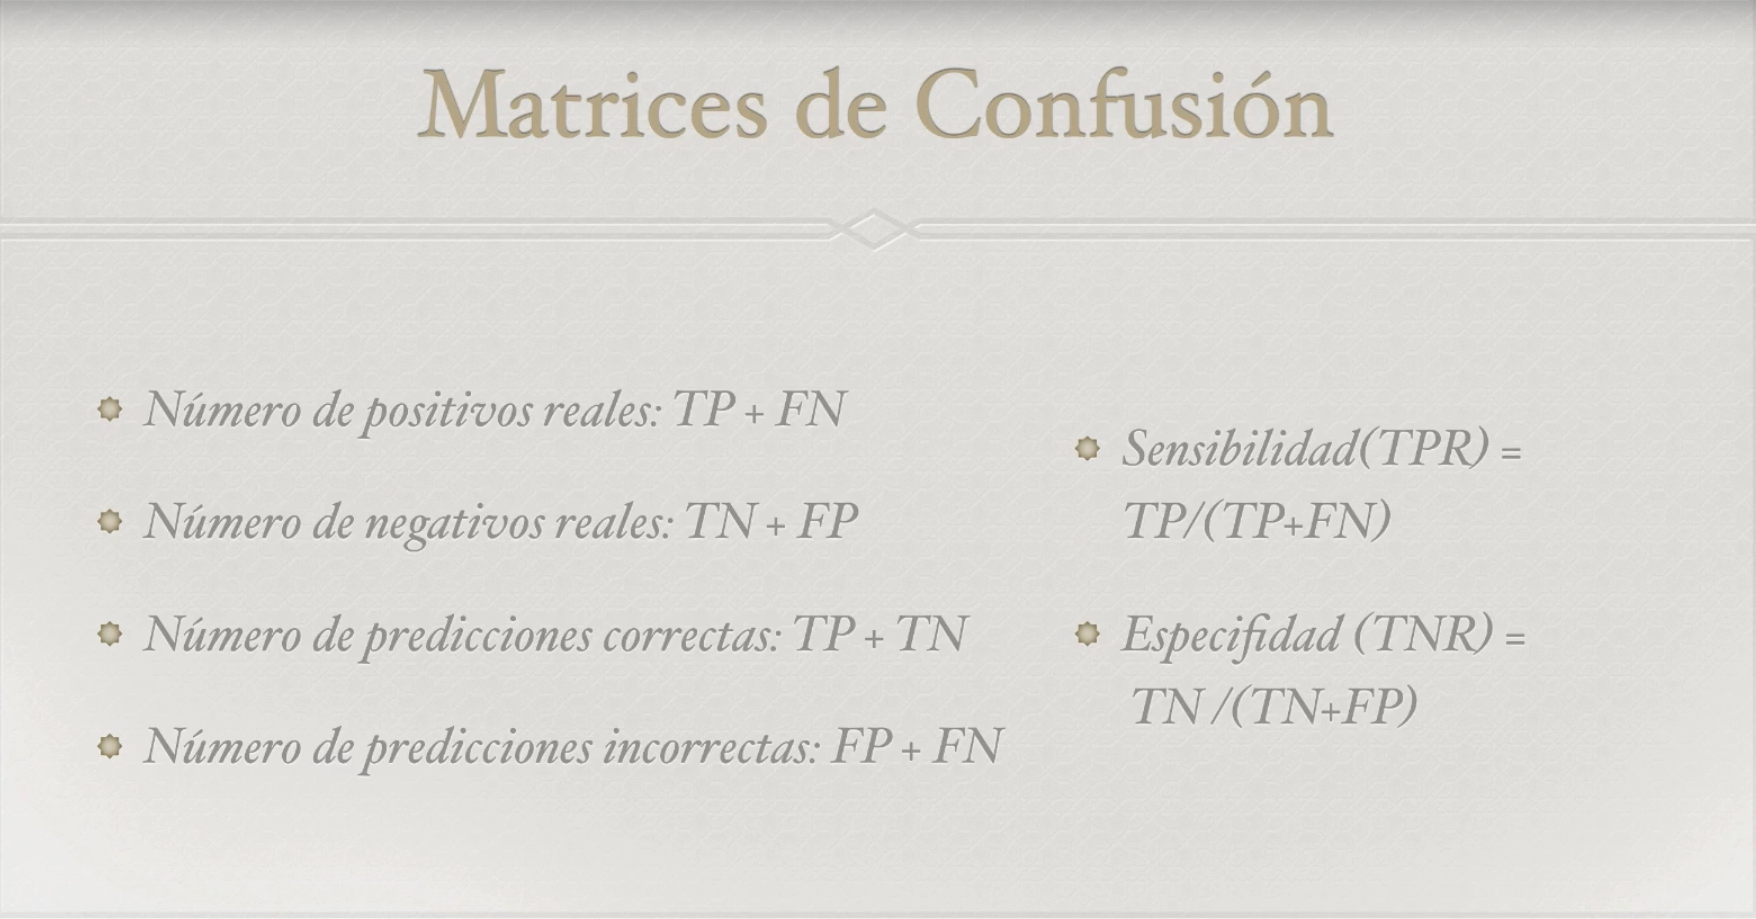

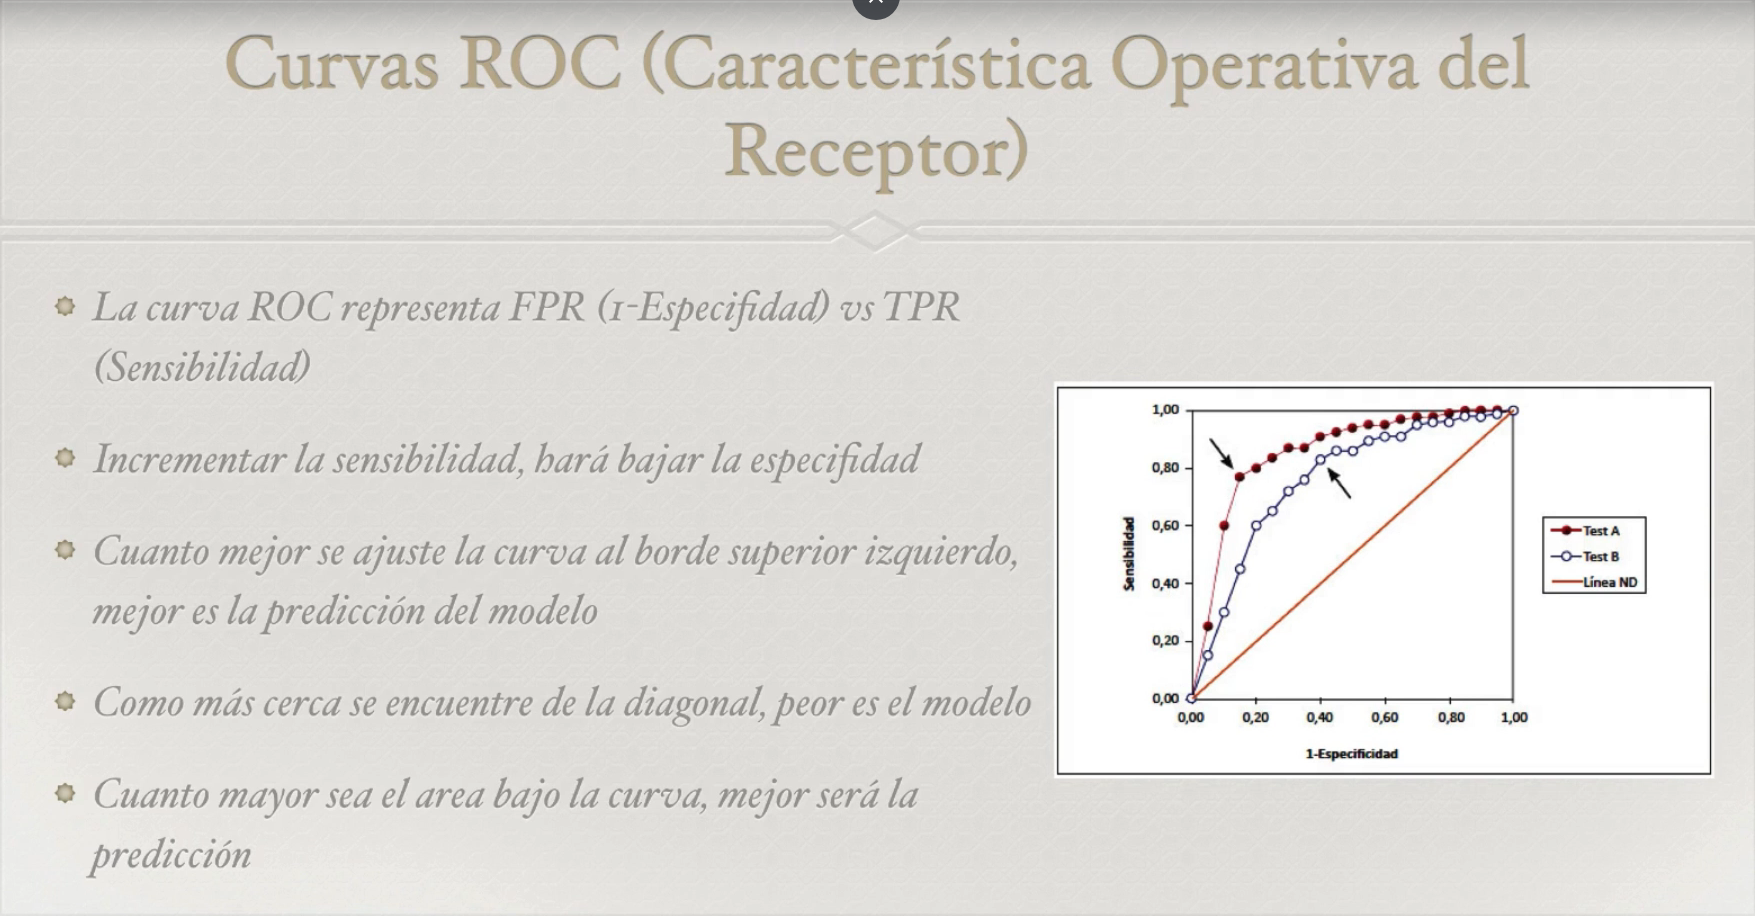

### Matrices de Confucion y curvas ROC

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(bank_df[depur_vars], bank_df[Y], test_size = 0.3, random_state = 0)

X_train.shape
Y_train.shape

(2883, 12)

(2883, 1)

In [ ]:
lr2 = linear_model.LogisticRegression().fit(X_train, Y_train.values.ravel())

In [ ]:
probs = lr2.predict_proba(X_test)
#probs
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0]>=threshold,1,0)
prob_df['actual'] = list(Y_test['y'])
prob_df




In [ ]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]

sens = TP/(TP+FN)
sens

espc_1 = 1 - TN/(TN+FP)
espc_1


Haciendo varias corridas cons distintos umbrales 

In [ ]:
threshold = [i/100 for i in range(5, 45, 5)]
#threshold
sensitivities = [1]
especifities_1 = [1]

for t in threshold:
    prob_df['prediction'] = np.where(prob_df[0]>=t,1,0)
    prob_df['actual'] = list(Y_test['y'])
    #prob_df

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    sens = TP/(TP+FN)
    sensitivities.append(sens)

    espc_1 = 1 - TN/(TN+FP)
    #espc_1
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [ ]:
plt.plot(especifities_1, sensitivities, marker ='o', linestyle='--', color='r' )
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('1-Especificidad')
plt.ylabel('Sensitividad')
plt.title('Curva ROC')

In [ ]:
from sklearn import metrics
from ggplot import *

In [ ]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)
dx = pd.DataFrame({
    'x':espc_1,
    'y': sensit
})
dx.head(10)

In [ ]:
ggplot(dx, aes(x='x', y='y'))+geom_line()+geom_abline(linetype='dashed')

In [ ]:
#Area bajo la curva de la ROC
auc= metrics.auc(espc_1,sensit)
auc

In [ ]:
ggplot(dx, aes(x='x', y='y')) + geom_area(alpha=0.25)+geom_line(aes(y='y'))+ggtitle('Curva ROC y AUC = %s'%str(auc))+xlab('1-Especificidad')+ylab('Sensitividad')

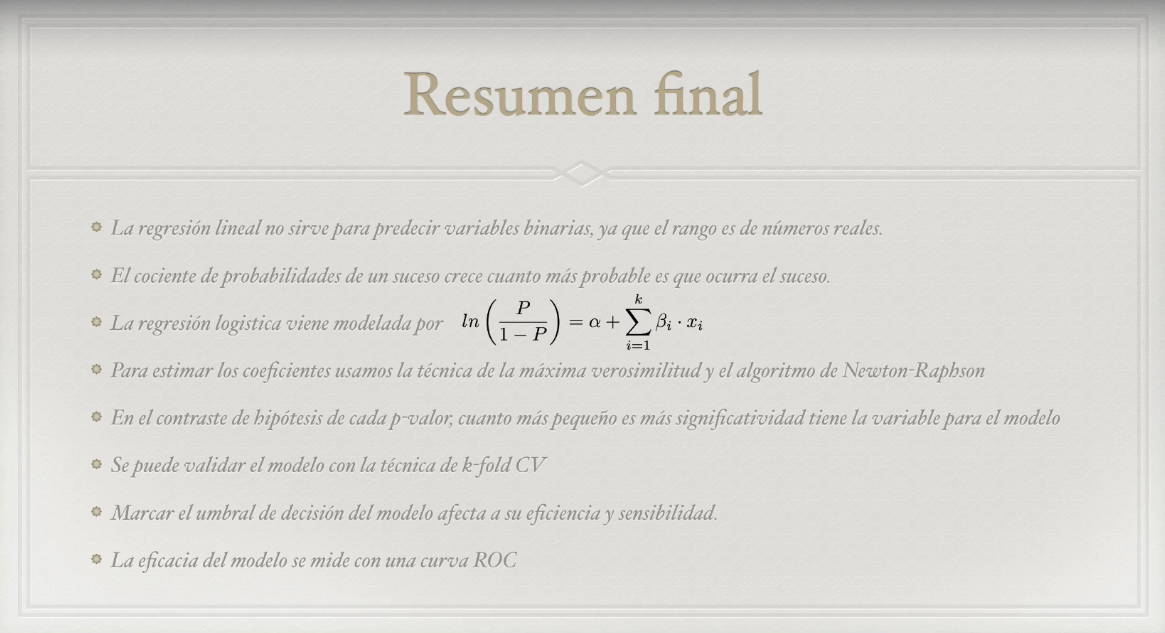